In [1]:
## 💻 Laptop Price Prediction Project
# This notebook covers the entire pipeline for predicting laptop prices using machine learning, from data ingestion to model deployment preparation.
#
# 📌 Dataset: Contains specifications of laptops and their prices in Euros.
#
# 🎯 Goal: Build a model that predicts price based on laptop specifications.

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import pickle
import re
import os

In [8]:
# Part 1: Data Ingestion
# Load the dataset and verify its integrity for analysis.
print("Part 1: Data Ingestion")
print("Steps: Load the dataset into a DataFrame, inspect rows/columns, check for missing values and duplicates.")

# Loading the dataset
df = pd.read_csv('/Users/sayansarkar/Documents/Mk2_Lpatop_price_prediction/Data/laptop_price - dataset.csv')


Part 1: Data Ingestion
Steps: Load the dataset into a DataFrame, inspect rows/columns, check for missing values and duplicates.


In [9]:
# Basic info
print("Dataset Shape:", df.shape)
df.info()
print("\nFirst 5 rows:")
print(df.head())
print("\nColumn Names:", df.columns.tolist())




Dataset Shape: (1275, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4

In [10]:
 #Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values[missing_values > 0])

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicated rows: {duplicate_rows}")


Missing Values:
 Series([], dtype: int64)

Number of duplicated rows: 0



Part 2: Data Understanding and Exploration (EDA)
Steps: Univariate Analysis (distributions), Bivariate Analysis (relationships with Price), Multivariate Analysis (feature interactions).


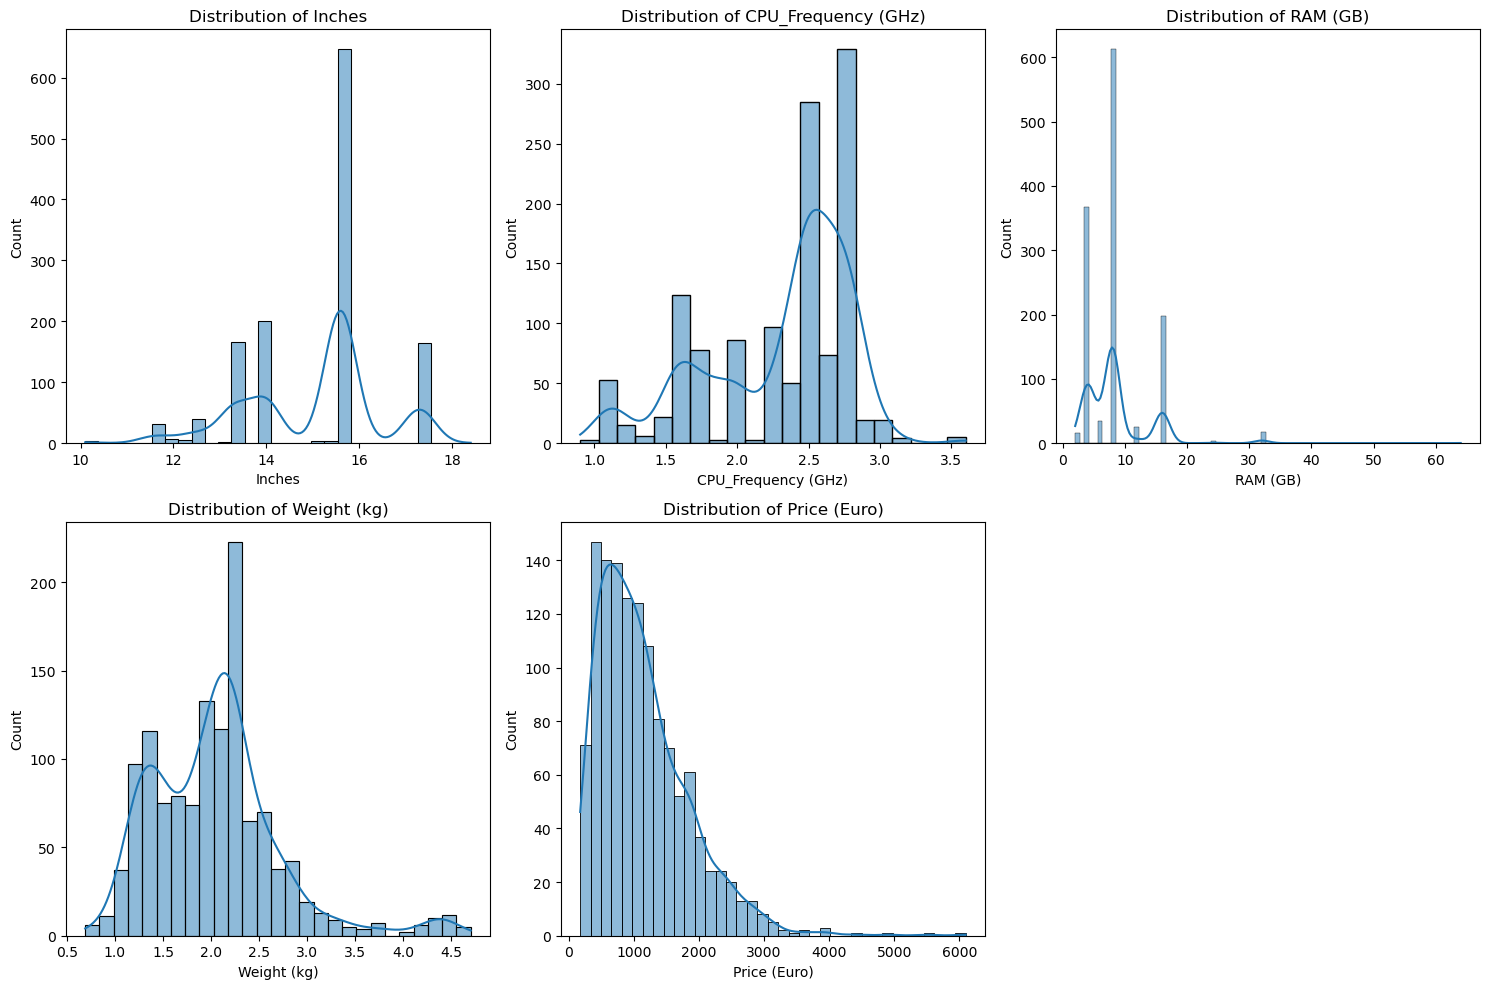

In [11]:
# Part 2: Data Understanding and Exploration (EDA)
print("\nPart 2: Data Understanding and Exploration (EDA)")
print("Steps: Univariate Analysis (distributions), Bivariate Analysis (relationships with Price), Multivariate Analysis (feature interactions).")

# Univariate Analysis
# Numerical features
numerical_features = ['Inches', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Weight (kg)', 'Price (Euro)']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

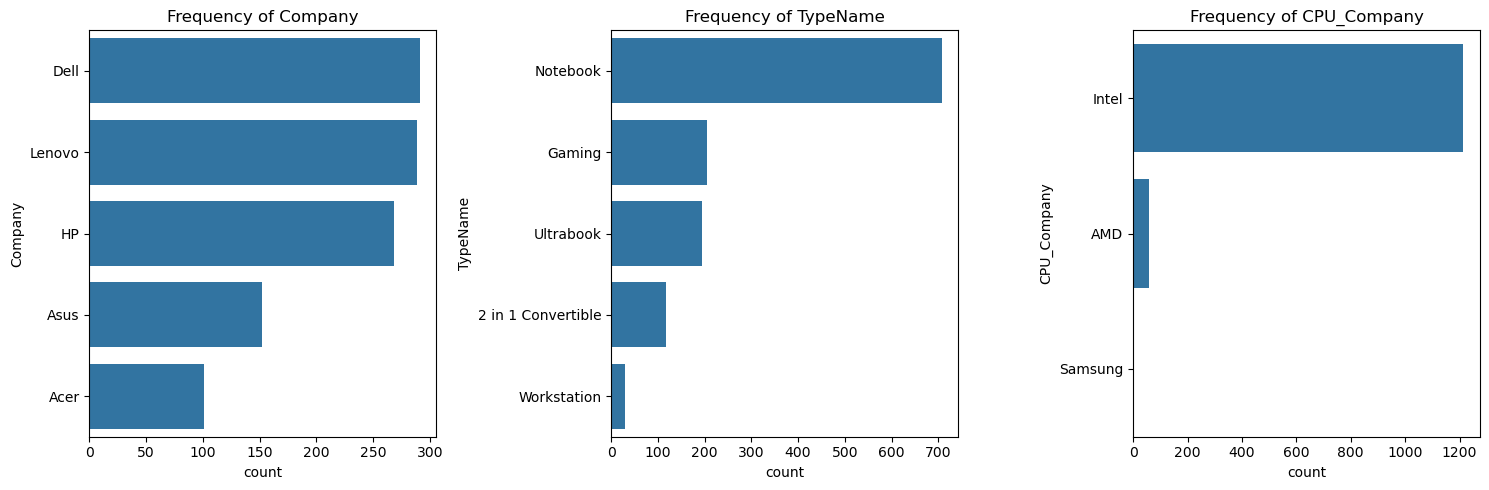

In [12]:
# Categorical features
categorical_features = ['Company', 'TypeName', 'CPU_Company']
plt.figure(figsize=(15, 5))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(y=df[feature], order=df[feature].value_counts().index[:5])
    plt.title(f'Frequency of {feature}')
plt.tight_layout()
plt.show()

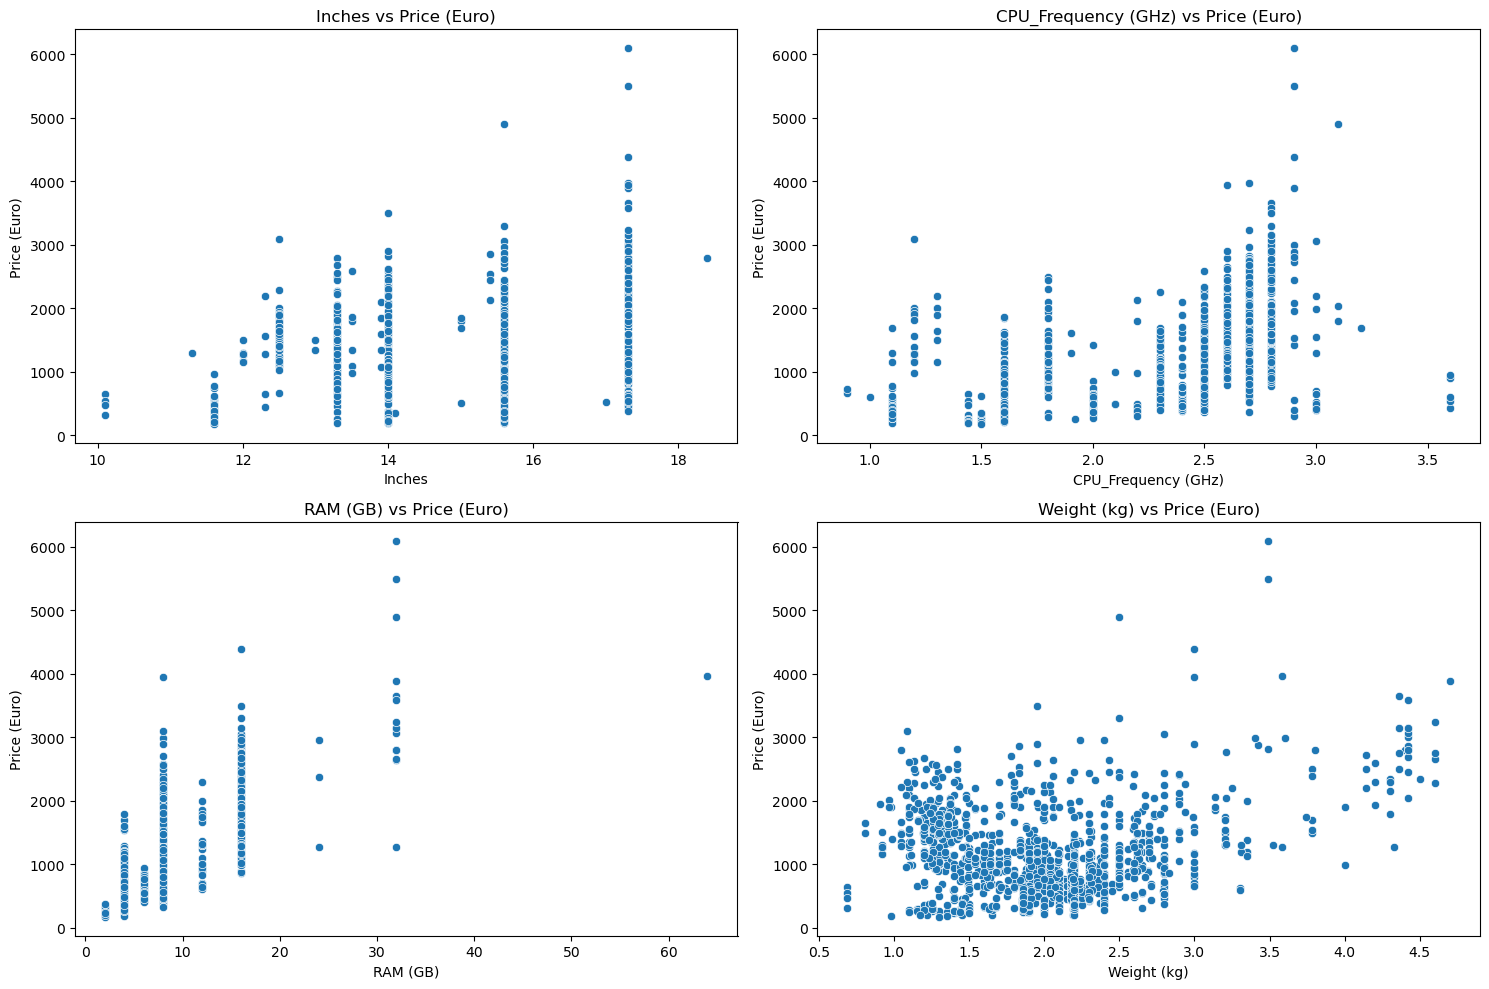

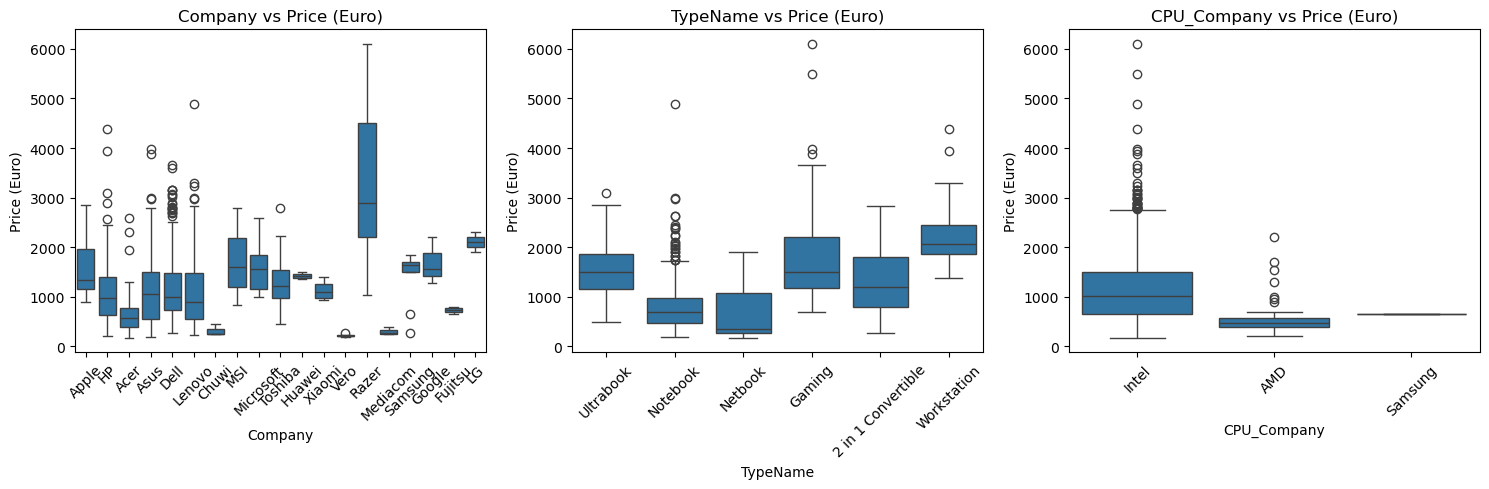

In [13]:
# Bivariate Analysis
# Numerical features vs Price
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features[:-1], 1):  # Exclude Price
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df[feature], y=df['Price (Euro)'])
    plt.title(f'{feature} vs Price (Euro)')
plt.tight_layout()
plt.show()

# Categorical features vs Price
plt.figure(figsize=(15, 5))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[feature], y=df['Price (Euro)'])
    plt.title(f'{feature} vs Price (Euro)')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

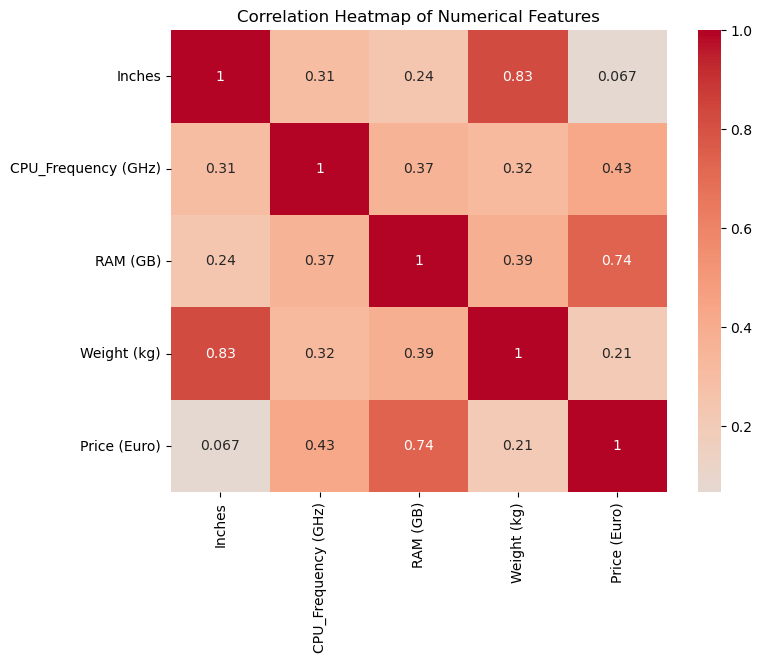

In [14]:
# Multivariate Analysis
# Correlation heatmap for numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [15]:
# Part 3: Data Cleaning
print("\nPart 3: Data Cleaning")
print("Steps: Handle missing values, remove duplicates, standardize categorical values.")

# Handle missing values (already checked, none found)
# Remove duplicates (already checked, none found)


Part 3: Data Cleaning
Steps: Handle missing values, remove duplicates, standardize categorical values.


In [16]:
# Standardize categorical values (e.g., ensure consistent case)
categorical_columns = ['Company', 'Product', 'TypeName', 'ScreenResolution', 'CPU_Company', 'CPU_Type', 'GPU_Company', 'GPU_Type', 'OpSys']
for col in categorical_columns:
    df[col] = df[col].str.lower().str.strip()

# Verify standardization
print("\nUnique values after standardization:")
for col in categorical_columns:
    print(f"{col}: {df[col].unique()[:5]}")  # Show first 5 unique values


Unique values after standardization:
Company: ['apple' 'hp' 'acer' 'asus' 'dell']
Product: ['macbook pro' 'macbook air' '250 g6' 'aspire 3' 'zenbook ux430un']
TypeName: ['ultrabook' 'notebook' 'netbook' 'gaming' '2 in 1 convertible']
ScreenResolution: ['ips panel retina display 2560x1600' '1440x900' 'full hd 1920x1080'
 'ips panel retina display 2880x1800' '1366x768']
CPU_Company: ['intel' 'amd' 'samsung']
CPU_Type: ['core i5' 'core i5 7200u' 'core i7' 'a9-series 9420' 'core i7 8550u']
GPU_Company: ['intel' 'amd' 'nvidia' 'arm']
GPU_Type: ['iris plus graphics 640' 'hd graphics 6000' 'hd graphics 620'
 'radeon pro 455' 'iris plus graphics 650']
OpSys: ['macos' 'no os' 'windows 10' 'mac os x' 'linux']


In [17]:
# Part 4: Data Preprocessing
print("\nPart 4: Data Preprocessing")
print("Steps: Encode categorical variables, scale numerical features, handle outliers, feature engineering.")
import re

# Feature Engineering: Extract HDD and SSD from Memory
def extract_storage(memory):
    memory = memory.lower().strip()
    hdd = 0
    ssd = 0
    
    # Split combined entries (e.g., "128gb ssd + 1tb hdd")
    parts = [part.strip() for part in memory.split('+')]
    
    for part in parts:
        # Extract number and unit using regex
        match = re.match(r'(\d+\.?\d*)\s*(gb|tb)\s*(ssd|hdd)', part)
        if match:
            size = float(match.group(1))  # Numeric value
            unit = match.group(2)  # gb or tb
            storage_type = match.group(3)  # ssd or hdd
            
            # Convert to GB
            if unit == 'tb':
                size *= 1000
            
            # Assign to HDD or SSD
            if storage_type == 'hdd':
                hdd = size
            elif storage_type == 'ssd':
                ssd = size
    
    return pd.Series([hdd, ssd])

df[['HDD', 'SSD']] = df['Memory'].apply(extract_storage)

# Handle outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

for col in numerical_features:
    df = remove_outliers(df, col)

# Rename columns to lowercase for consistency
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

# Define features and target
X = df.drop('price_(euro)', axis=1)
y = df['price_(euro)']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
categorical_features = ['company', 'product', 'typename', 'screenresolution', 'cpu_company', 'cpu_type', 'gpu_company', 'gpu_type', 'opsys']
numerical_features = ['inches', 'cpu_frequency_(ghz)', 'ram_(gb)', 'weight_(kg)', 'hdd', 'ssd']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ])



Part 4: Data Preprocessing
Steps: Encode categorical variables, scale numerical features, handle outliers, feature engineering.


In [18]:
# Part 5: Model Building and Evaluation
print("\nPart 5: Model Building and Evaluation")
print("Steps: Split dataset, train regression models, optimize with GridSearchCV, evaluate with R², MSE, RMSE, select best model.")





Part 5: Model Building and Evaluation
Steps: Split dataset, train regression models, optimize with GridSearchCV, evaluate with R², MSE, RMSE, select best model.


In [19]:


# Load dataset (adjust path to your dataset location)
df = pd.read_csv('/Users/sayansarkar/Documents/Mk2_Lpatop_price_prediction/Data/laptop_price - dataset.csv')

# Function to extract HDD and SSD
def extract_storage(memory):
    memory = memory.lower().strip()
    hdd = 0.0
    ssd = 0.0
    parts = [part.strip() for part in memory.split('+')]
    for part in parts:
        match = re.match(r'(\d+\.?\d*)\s*(gb|tb)\s*(ssd|hdd)', part)
        if match:
            size = float(match.group(1))
            unit = match.group(2)
            storage_type = match.group(3)
            if unit == 'tb':
                size *= 1000
            if storage_type == 'hdd':
                hdd = size
            elif storage_type == 'ssd':
                ssd = size
    return pd.Series([hdd, ssd], dtype=float)

# Extract HDD and SSD
df[['HDD', 'SSD']] = df['Memory'].apply(extract_storage)
df = df.drop('Memory', axis=1)

# Define features
categorical_features = ['Company', 'Product', 'TypeName', 'ScreenResolution', 'CPU_Company', 'CPU_Type', 'GPU_Company', 'GPU_Type', 'OpSys']
numerical_features = ['Inches', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Weight (kg)', 'HDD', 'SSD']

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ])

# Prepare data
X = df[categorical_features + numerical_features]
y = df['Price (Euro)']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42)
}

# Define model-specific parameter grids
param_grids = {
    'Decision Tree': {
        'regressor__max_depth': [3, 5],
        'regressor__min_samples_split': [2, 5]
    },
    'Random Forest': {
        'regressor__n_estimators': [100, 200],
        'regressor__max_depth': [3, 5]
    },
    'GradientBoosting': {
        'regressor__n_estimators': [100, 200],
        'regressor__max_depth': [3, 5],
        'regressor__learning_rate': [0.1, 0.05]
    }
}

# Store results
results = []

# Train and evaluate each model
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('regressor', model)
    ])
    
    # Hyperparameter tuning for non-linear models
    if name != 'Linear Regression':
        param_grid = param_grids[name]
        grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=2, scoring='r2')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        print(f"\nBest parameters for {name}: {grid_search.best_params_}")
    else:
        pipeline.fit(X_train, y_train)
        best_model = pipeline
    
    # Evaluate
    y_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results.append({
        'Model': name,
        'R² Score': r2,
        'MSE': mse,
        'RMSE': rmse,
        'Best_Model': best_model
    })
    
    print(f"\n{name} Performance:")
    print(f"R² Score: {r2:.4f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")

# Select best model
best_result = max(results, key=lambda x: x['R² Score'])
print(f"\nBest Model: {best_result['Model']}")
print(f"R² Score: {best_result['R² Score']:.4f}")
print(f"MSE: {best_result['MSE']:.2f}")
print(f"RMSE: {best_result['RMSE']:.2f}")

# Save the best model, columns, and preprocessor
model_dir = '../model/'
os.makedirs(model_dir, exist_ok=True)  # Create directory if it doesn't exist
with open(os.path.join(model_dir, 'model.pkl'), 'wb') as f:
    pickle.dump(best_result['Best_Model'], f)
with open(os.path.join(model_dir, 'model_columns.pkl'), 'wb') as f:
    # Save one-hot encoded column names
    cat_encoder = best_result['Best_Model'].named_steps['preprocessing'].named_transformers_['cat']
    cat_columns = cat_encoder.get_feature_names_out(categorical_features)
    model_columns = list(cat_columns) + numerical_features
    pickle.dump(model_columns, f)
with open(os.path.join(model_dir, 'preprocessor.pkl'), 'wb') as f:
    pickle.dump(preprocessor, f)

print(f"Model, columns, and preprocessor saved successfully to {model_dir}")
print(f"Model columns: {model_columns}")


Linear Regression Performance:
R² Score: -7077781260938635116544.0000
MSE: 3512980818039044217019301888.00
RMSE: 59270404233808.33
Fitting 3 folds for each of 4 candidates, totalling 12 fits

Best parameters for Decision Tree: {'regressor__max_depth': 5, 'regressor__min_samples_split': 5}

Decision Tree Performance:
R² Score: 0.7445
MSE: 126836.70
RMSE: 356.14
Fitting 3 folds for each of 4 candidates, totalling 12 fits

Best parameters for Random Forest: {'regressor__max_depth': 5, 'regressor__n_estimators': 100}

Random Forest Performance:
R² Score: 0.8046
MSE: 96972.06
RMSE: 311.40
Fitting 3 folds for each of 8 candidates, totalling 24 fits

Best parameters for GradientBoosting: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 200}

GradientBoosting Performance:
R² Score: 0.9021
MSE: 48572.91
RMSE: 220.39

Best Model: GradientBoosting
R² Score: 0.9021
MSE: 48572.91
RMSE: 220.39
Model, columns, and preprocessor saved successfully to ../model/
Mo